In [1]:
library("tidyverse")
library("ranger")
library("Amelia")
library("caret")
library("pROC")
library("diversityForest")

data_agri <- read.csv("Final_Data_01.csv",sep=';')
data_econ <-read_csv("econ_data_new_2.csv")

data_econ = data_econ[data_econ$sector=='A',]
data_agri = data_agri[data_agri$sector=='A',]

data_final_01<-merge(x = data_agri, y = data_econ, by = c("geo","year"), all.x = TRUE)

vars_to_drop<-c('X','geo','sector.x','sector.y','gdp.x',
                'gdp.y','country','share','gva','gva_emp',
'gva_emp_gr','area.y','gva_area','empl','gva_area_gr','GVA','gva_area_log_diff','gva_emp_log_diff','gva_gr','gva_log_diff',
                'country','share','gdp.y')

data_final_01 <- data_final_01 %>% select(-vars_to_drop)

data_final_01 <- data_final_01 %>% filter(is.finite(gva__gr))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2023 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects a

In [2]:
data_final_01 <- drop_na(data_final_01)
train_set <- data_final_01[data_final_01$year!=2017,]
validation_set <-data_final_01[data_final_01$year==2017,]

In [219]:
max_depth <- c(5,10,15,20,25,30,40)
for (i in max_depth){
modelcat <- interactionfor(dependent.variable.name = "gva__gr", 
                           data = head(data_final_01,-1000), max.depth=i,
num.trees = 100)
print(rmse(predict(modelcat,tail(data_final_01,1000))$predictions,tail(data_final_01,1000)$gva_gr))
}

[1] 27.31921
[1] 26.19955
Computing EIM values.. Progress: 36%. Estimated remaining time: 55 seconds.
Computing EIM values.. Progress: 83%. Estimated remaining time: 12 seconds.
[1] 25.8501
Computing EIM values.. Progress: 17%. Estimated remaining time: 2 minutes, 50 seconds.
Computing EIM values.. Progress: 49%. Estimated remaining time: 1 minute, 13 seconds.
Computing EIM values.. Progress: 81%. Estimated remaining time: 24 seconds.
[1] 25.79802
Computing EIM values.. Progress: 17%. Estimated remaining time: 2 minutes, 55 seconds.
Computing EIM values.. Progress: 49%. Estimated remaining time: 1 minute, 20 seconds.
Computing EIM values.. Progress: 81%. Estimated remaining time: 26 seconds.
[1] 25.77197
Computing EIM values.. Progress: 17%. Estimated remaining time: 3 minutes, 5 seconds.
Computing EIM values.. Progress: 49%. Estimated remaining time: 1 minute, 20 seconds.
Computing EIM values.. Progress: 81%. Estimated remaining time: 27 seconds.
[1] 25.81845
Computing EIM values.. Pr

In [5]:
model_df_agriculture <- interactionfor(dependent.variable.name = "gva__gr", 
                           data = train_set, max.depth=25,
num.trees = 2000, seed=36)

Growing trees.. Progress: 34%. Estimated remaining time: 1 minute, 1 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 29 seconds.
Computing EIM values.. Progress: 1%. Estimated remaining time: 1 hour, 17 minutes, 45 seconds.
Computing EIM values.. Progress: 2%. Estimated remaining time: 53 minutes, 45 seconds.
Computing EIM values.. Progress: 4%. Estimated remaining time: 47 minutes, 46 seconds.
Computing EIM values.. Progress: 6%. Estimated remaining time: 45 minutes, 5 seconds.
Computing EIM values.. Progress: 7%. Estimated remaining time: 43 minutes, 4 seconds.
Computing EIM values.. Progress: 9%. Estimated remaining time: 40 minutes, 45 seconds.
Computing EIM values.. Progress: 10%. Estimated remaining time: 41 minutes, 11 seconds.
Computing EIM values.. Progress: 11%. Estimated remaining time: 39 minutes, 30 seconds.
Computing EIM values.. Progress: 12%. Estimated remaining time: 39 minutes, 35 seconds.
Computing EIM values.. Progress: 13%. Estimated remaining tim

In [ ]:
library(Metrics)
rmse(predict(modelcat,tail(data_final_01,1000))$predictions,tail(data_final_01,1000)$gva_gr)

In [ ]:
data_final_01$gva_gr[1000:1010]

In [ ]:
plot(head(data_final_01,-1000)$gva_gr,modelcat$predictions)

In [121]:
modelcat$predictions[1000:1010]

[1] 1.512892 3.330152 2.323268 3.635237 1.051637 1.227718 1.297451 2.518752
 [9] 2.561189 4.363355 3.108728

In [6]:
modelcat$eim.univ.sorted[0:10]

ERROR: Error in eval(expr, envir, enclos): object 'modelcat' not found


In [9]:
model_df_agriculture$eim.quant.sorted[0:10]

hi_SUMMER_L1 small AND TMAX_WINTER_normal_L1 large 
                                         0.6406582 
           hi_FALL_L1 small AND hi_SUMMER_L1 small 
                                         0.5183917 
             SMA_FALL small AND hi_SUMMER_L1 small 
                                         0.5137733 
 LFI_FALL_L1 small AND TMAX_WINTER_normal_L1 large 
                                         0.5004513 
hi_SPRING_L1 small AND TMAX_WINTER_normal_L1 large 
                                         0.4867101 
  hi_FALL_L1 small AND TMAX_WINTER_normal_L1 large 
                                         0.4398330 
      TMAX_SPRING_normal large AND hi_WINTER small 
                                         0.4336916 
      area.x small AND TMAX_WINTER_normal_L1 large 
                                         0.4105867 
 TMAX_SUMMER small AND TMAX_WINTER_normal_L1 small 
                                         0.4097719 
   hi_WINTER small AND TMAX_WINTER_normal_L1 large 
                                         0.4076003

In [162]:
modelcat$eim.qual.sorted[1:10]

SPI_SPRING AND LAT  SPI_WINTER AND MIN_SMA_L1 
                 0.5659293                  0.5155464 
employment AND MAX_TMAX_L1 SMA_WINTER AND TMAX_WINTER 
                 0.2837220                  0.2820353 
  SPI_FALL AND MAX_TMAX_L1  employment AND SMA_SPRING 
                 0.2777774                  0.2471281 
MAX_TMAX_L2 AND MIN_SPI_L2        MAX_TMAX_L2 AND LAT 
                 0.2443901                  0.2424742 
TMAX_WINTER AND Nearby_SPI    MIN_SPI AND MAX_TMAX_L1 
                 0.2345984                  0.2184491

In [2]:
data_agri<-data_agri[,5:58]

In [3]:
data_agri$APAR_SPRING <- NULL
data_agri$APAR_SUMMER <- NULL
data_agri$APAR_FALL <- NULL
data_agri$APAR_WINTER <- NULL
data_agri$Nearby_APAR_L1 <- NULL
data_agri$Nearby_APAR <- NULL
data_agri$MIN_APAR_L2 <- NULL
data_agri$MIN_APAR_L1 <- NULL
data_agri$MIN_APAR <- NULL

In [4]:
dim(drop_na(data_agri))

[1] 11633    45

In [6]:
colnames(data_agri)

[1] "area"           "employment"     "gdp"            "GVA"           
 [5] "population"     "MIN_SMA"        "MAX_TMAX"       "MIN_SPI"       
 [9] "MAX_LFI"        "MAX_HI"         "LFI_WINTER"     "LFI_SPRING"    
[13] "LFI_SUMMER"     "LFI_FALL"       "SMA_WINTER"     "SMA_SPRING"    
[17] "SMA_SUMMER"     "SMA_FALL"       "SPI_WINTER"     "SPI_SPRING"    
[21] "SPI_SUMMER"     "SPI_FALL"       "TMAX_WINTER"    "TMAX_SPRING"   
[25] "TMAX_SUMMER"    "TMAX_FALL"      "Nearby_TMAX"    "Nearby_SPI"    
[29] "Nearby_LF1"     "Nearby_HI"      "MIN_SMA_L1"     "MAX_TMAX_L1"   
[33] "MIN_SPI_L1"     "MAX_HI_L1"      "MAX_LFI_L1"     "MIN_SMA_L2"    
[37] "MAX_TMAX_L2"    "MIN_SPI_L2"     "MAX_HI_L2"      "MAX_LFI_L2"    
[41] "Nearby_SPI_L1"  "Nearby_TMAX_L1" "Nearby_LFI_L1"  "LAT"           
[45] "LON"

In [12]:
modelcat <- interactionfor(dependent.variable.name = "GVA", data = drop_na(data_agri),
num.trees = 2000)

Growing trees.. Progress: 50%. Estimated remaining time: 31 seconds.
Growing trees.. Progress: 100%. Estimated remaining time: 0 seconds.


In [13]:
modelcat$eim.quant.sorted

employment large AND gdp large 
                                1.124156e+02 
              employment large AND LAT small 
                                1.055103e+02 
             area large AND population large 
                                1.016587e+02 
                    area large AND gdp large 
                                8.043462e+01 
                    area large AND LAT small 
                                7.439395e+01 
            area large AND TMAX_WINTER large 
                                6.917321e+01 
      employment large AND TMAX_WINTER large 
                                6.373567e+01 
             gdp large AND TMAX_WINTER large 
                                6.370097e+01 
        population large AND TMAX_FALL large 
                                6.051957e+01 
       employment large AND population large 
                                5.655720e+01 
       employment small AND LFI_WINTER small 
                                5.570135e+01 
      population large AND TMAX_WINTER large 
                                5.537916e+01 
              area large AND TMAX_FALL large 
                                5.274644e+01 
              population large AND LAT small 
                                4.999660e+01 
               gdp large AND TMAX_FALL large 
                                4.632142e+01 
                     gdp large AND LON small 
                                4.346932e+01 
       population small AND LFI_SPRING small 
                                4.097557e+01 
               gdp large AND MAX_HI_L1 small 
                                3.901152e+01 
             area large AND employment large 
                                3.861105e+01 
              population large AND LON small 
                                3.678414e+01 
       employment small AND LFI_SUMMER small 
                                3.664665e+01 
        employment large AND MAX_HI_L1 small 
                                3.484738e+01 
                  gdp large AND MAX_HI small 
                                3.482907e+01 
        employment large AND MAX_HI_L2 small 
                                3.468448e+01 
                     gdp large AND LAT small 
                                3.446312e+01 
           employment large AND MAX_HI small 
                                3.315065e+01 
              gdp large AND population large 
                                2.914884e+01 
             area small AND LFI_SPRING small 
                                2.900990e+01 
       employment small AND LFI_SPRING small 
                                2.828899e+01 
             TMAX_WINTER large AND LON small 
                                2.783616e+01 
             gdp large AND TMAX_SUMMER large 
                                2.752442e+01 
               gdp large AND Nearby_HI small 
                                2.649878e+01 
       employment small AND Nearby_SPI small 
                                2.553156e+01 
              gdp small AND LFI_WINTER small 
                                2.534491e+01 
                 area large AND MAX_HI small 
                                2.488470e+01 
       TMAX_WINTER large AND TMAX_FALL large 
                                2.468846e+01 
       employment large AND SMA_SUMMER small 
                                2.461582e+01 
              area large AND MAX_HI_L2 small 
                                2.420584e+01 
          employment large AND MIN_SMA large 
                                2.417153e+01 
         employment small AND LFI_FALL small 
                                2.405668e+01 
        population large AND MAX_HI_L1 small 
                                2.343785e+01 
              gdp small AND LFI_SPRING small 
                                2.341869e+01 
              gdp large AND MIN_SMA_L1 large 
                                2.302943e+01 
             gdp large AND MAX_TMAX_L1 large 
            

In [11]:
modelcat$eim.qual.sorted

population AND LFI_SPRING                      LAT AND LON 
                   12.4023966300                     5.5465105707 
       Nearby_HI AND MAX_TMAX_L2              area AND population 
                    4.3944075994                     4.3643773660 
        MAX_TMAX AND MAX_TMAX_L2           MIN_SMA AND Nearby_LF1 
                    4.1079850278                     3.1053617099 
    TMAX_FALL AND Nearby_TMAX_L1              MAX_TMAX_L2 AND LAT 
                    2.1129900193                     2.0040528440 
             TMAX_SUMMER AND LON               gdp AND LFI_SUMMER 
                    1.9728012705                     1.8138728693 
       LFI_WINTER AND LFI_SPRING        LFI_SPRING AND Nearby_SPI 
                    1.1924077885                     1.0471396744 
               TMAX_FALL AND LAT              MAX_TMAX_L1 AND LON 
                    1.0239688828                     1.0080195728 
       Nearby_LF1 AND MAX_LFI_L1        SPI_WINTER AND MIN_SMA_L2 
                    0.8164647603                     0.7276882236 
   TMAX_WINTER AND Nearby_LFI_L1        SPI_SUMMER AND Nearby_SPI 
                    0.7046054725                     0.6684596595 
             MAX_TMAX_L2 AND LON              TMAX_WINTER AND LAT 
                    0.6504546905                     0.6228877323 
       MAX_TMAX_L2 AND MAX_HI_L2     LFI_WINTER AND Nearby_SPI_L1 
                    0.5976985994                     0.5820182856 
          MAX_LFI AND Nearby_SPI       LFI_SUMMER AND TMAX_SPRING 
                    0.5773294298                     0.5604941600 
       LFI_WINTER AND Nearby_SPI         LFI_SUMMER AND TMAX_FALL 
                    0.5215286140                     0.5199493795 
      Nearby_LF1 AND MAX_TMAX_L1      TMAX_WINTER AND TMAX_SPRING 
                    0.4076821919                     0.3716981733 
      SPI_SPRING AND Nearby_TMAX      MAX_HI_L2 AND Nearby_SPI_L1 
                    0.3482840999                     0.3453773890 
           MIN_SMA AND TMAX_FALL       MAX_TMAX_L2 AND MAX_LFI_L2 
                    0.3297035025                     0.3046789862 
       SMA_SPRING AND SPI_WINTER        SMA_WINTER AND Nearby_SPI 
                    0.2703713660                     0.2513972484 
         SMA_SPRING AND SMA_FALL       SPI_WINTER AND Nearby_TMAX 
                    0.2490340476                     0.2443152541 
        LFI_FALL AND Nearby_TMAX        MIN_SPI AND Nearby_SPI_L1 
                    0.1980895162                     0.1312584820 
        SMA_SPRING AND Nearby_HI             MIN_SPI AND LFI_FALL 
                    0.1177545157                     0.1158436669 
      LFI_SPRING AND MAX_TMAX_L1        LFI_SUMMER AND SPI_SUMMER 
                    0.1131710280                     0.1072018983 
         LFI_FALL AND SMA_SUMMER      TMAX_SPRING AND MAX_TMAX_L1 
                    0.1049057879                     0.1022955671 
        LFI_WINTER AND MAX_HI_L1        SMA_SUMMER AND SPI_SUMMER 
                    0.0857101667                     0.0799317831 
      TMAX_SUMMER AND MIN_SPI_L1            MAX_HI AND Nearby_LF1 
                    0.0748095006                     0.0658216713 
         MAX_LFI AND Nearby_TMAX           SPI_FALL AND Nearby_HI 
                    0.0593029630                     0.0578545884 
         SPI_FALL AND MIN_SPI_L2          SPI_SUMMER AND SPI_FALL 
                    0.0317606282                     0.0261923100 
 Nearby_SPI_L1 AND Nearby_LFI_L1       SMA_SPRING AND MAX_TMAX_L2 
                    0.0254830982                     0.0246909921 
        Nearby_HI AND MAX_LFI_L1                      gdp AND LAT 
                    0.0204116759                     0.0130366527 
        Nearby_HI AND MIN_SPI_L2       LFI_WINTER AND Nearby_TMAX 
                    0.0128639821                     0.0128415843 
         MIN_SMA AND Nearby_TMAX         LFI_SUMMER AND MAX_HI_L2 
                    0.0096063767                     0

In [ ]:
## Applying diversity forest after optimizing the values of nsplits and proptry (recommended)
tuneres <- tunedivfor(formula = GVA ~ ., data = drop_na(data_agri), num.trees.pre = 200)

In [1]:
# NOTE: num.trees.pre = 20 is specified too small for practical
# purposes - the out-of-bag error estimates of the forests
# constructed during optimization will be much too variable!!
# In practice, num.trees.pre = 500 (default value) or a
# larger number should be used.
divfor(Species ~ ., data = iris, nsplits = tuneres$nsplitsopt,
proptry = tuneres$proptryopt, num.trees = 20)
# NOTE again: num.trees = 20 is specified too small for practical purposes.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2023 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects a

...1 year geo   sector area  employment gdp    GVA   population MIN_SMA ⋯
1 262  2014 AT112 A      17920 4.7        453154  1140 15302      -0.162  ⋯
2 263  2014 AT112 B-E    17920 9.1        453154  7760 15302      -0.162  ⋯
3 264  2014 AT112 C      17920 7.8        453154  5590 15302      -0.162  ⋯
4 265  2014 AT112 F      17920 5.2        453154  3110 15302      -0.162  ⋯
5 266  2014 AT112 G-J    17920 19.6       453154 10040 15302      -0.162  ⋯
6 267  2014 AT112 K-N    17920 7.9        453154  9260 15302      -0.162  ⋯
  MIN_SPI_L2 MIN_APAR_L2 MAX_HI_L2 MAX_LFI_L2 Nearby_SPI_L1 Nearby_TMAX_L1
1 -1.89      -0.698      3.5428085 0.188      -0.8825       0.938         
2 -1.89      -0.698      3.5428085 0.188      -0.8825       0.938         
3 -1.89      -0.698      3.5428085 0.188      -0.8825       0.938         
4 -1.89      -0.698      3.5428085 0.188      -0.8825       0.938         
5 -1.89      -0.698      3.5428085 0.188      -0.8825       0.938         
6 -1.89      -0.698      3.5428085 0.188      -0.8825       0.938         
  Nearby_APAR_L1 Nearby_LFI_L1 LAT                LON         
1 30431          -1.194        16.772581892572436 4.785828e+16
2 30431          -1.194        16.772581892572436 4.785828e+16
3 30431          -1.194        16.772581892572436 4.785828e+16
4 30431          -1.194        16.772581892572436 4.785828e+16
5 30431          -1.194        16.772581892572436 4.785828e+16
6 30431          -1.194        16.772581892572436 4.785828e+16

divfor result

Call:
 divfor(Species ~ ., data = iris, nsplits = tuneres$nsplitsopt,      proptry = tuneres$proptryopt, num.trees = 20) 

Type:                             Classification 
Number of trees:                  20 
Sample size:                      150 
Number of independent variables:  4 
Nsplits:                          200 
Proptry:                          1 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             4.67 % 

MIN_SMA_L1         MAX_HI     SMA_WINTER        MIN_SMA        MIN_SPI 
   35431929692    24630083059    16222821516    15623110917    13225293801 
   TMAX_WINTER    MIN_APAR_L1       SMA_FALL            geo     SPI_WINTER 
    9978987515     9701966896     9100672201     8248511881     7586080061 
    MIN_SMA_L2     SMA_SPRING       MIN_APAR     SMA_SUMMER            LAT 
    7499226275     7109649236     6358898744     6235822245     5791108481 
     APAR_FALL     MIN_SPI_L1     SPI_SPRING           area    MIN_APAR_L2 
    5131172737     5017174179     3589776726     3410952815     3056250528 
   APAR_SUMMER    APAR_WINTER    APAR_SPRING       SPI_FALL            LON 
    2510055909     2177633503     1680351374     1454244570     1189656491 
    SPI_SUMMER        MAX_LFI     MIN_SPI_L2    TMAX_SUMMER      Nearby_HI 
     904495027      638323619      391566701      376137701      351191804 
     MAX_HI_L2    Nearby_APAR      MAX_HI_L1       LFI_FALL     MAX_LFI_L1 
     295247420      263678879      228658034      216813070      180725595 
 Nearby_SPI_L1  Nearby_LFI_L1     LFI_WINTER      TMAX_FALL    MAX_TMAX_L2 
     156929670      146806986      125110346      110262731      109425070 
    Nearby_LF1 Nearby_APAR_L1     LFI_SUMMER     population       MAX_TMAX 
     107913053       81263113       46266101       40155649       39350805 
    LFI_SPRING           year     MAX_LFI_L2     Nearby_SPI           ...1 
      35023018       33599421       19788335       18080029       17270352 
Nearby_TMAX_L1    Nearby_TMAX    TMAX_SPRING    MAX_TMAX_L1         sector 
      14260954       13252903        6658413        2235313              0 
    employment            GVA 
             0              0

TMAX_WINTER large AND MAX_HI_L1 large (TMAX_WINTER: 1.6426666666666658 < -1.5593333333333332 < 4.931666666666664 < 3.249000000000006 < 0.008999999999998861 < 0.8096666666666644 < 0.8779999999999974 < 7.076666666666672 < -1.6870000000000023 < 5.8790000000000004 < 6.386666666666669 < 7.771333333333334 < 7.734666666666667 < 8.470333333333334 < 7.7076666666666656 < 6.841 < 7.305999999999998 < 4.467999999999999 < 4.002000000000002 < 2.4833333333333325 < 8.014999999999999 < 4.131666666666665 < 2.6449999999999974 < 6.816999999999999 < 3.040999999999999 < 3.758333333333331 < 7.348333333333332 < 2.498333333333332 < 3.0789999999999975 < 5.737333333333331 < -0.016666666666669123 < 3.1979999999999973 < -0.7613333333333357 < 1.4919999999999989 < 2.1859999999999986 < 1.7943333333333322 < 1.9366666666666665 < 5.994666666666667 < 9.104999999999999 < 5.151666666666666 < 5.2556666666666665 < 8.323666666666666 < 5.320333333333333 < 9.029333333333332 < 1.555 < 7.998333333333332 < 7.4440000000000035 < 7.133999999999998 < 7.101333333333337 < 4.894999999999999 < 7.538666666666671 < 5.504999999999998 < 7.029333333333338 < 4.7786666666666635 < 4.004333333333331 < 4.427999999999998 < 6.289333333333332 < 8.26533333333333 < 3.2079999999999966 < 5.745666666666666 < 2.150666666666663 < 2.9733333333333305 < -0.10766666666666902 < 6.278333333333332 < 6.900999999999997 < 3.8513333333333346 < 7.556333333333336 < 5.005333333333334 < 5.753000000000003 < 7.853666666666663 < 1.7716666666666665 < 2.0413333333333337 < 6.644333333333331 < 5.530000000000005 < 6.190666666666672 < 3.6509999999999976 < 3.132000000000005 < 1.7486666666666666 < 2.1770000000000005 < 8.562333333333337 < 6.490666666666669 < 7.413666666666667 < 7.365333333333332 < 4.875000000000003 < -0.4913333333333334 < 5.495000000000002 < 7.764666666666664 < 7.57833333333334 < 4.627333333333335 < 7.803333333333332 < 6.532666666666667 < 6.778666666666672 < 5.50633333333333 < 1.799000000000001 < 3.7296666666666654 < 3.7326666666666726 < 7.660666666666671 < 8.473333333333336 < 8.705000000000004 < 6.291666666666664 < 5.2319999999999975 < 7.632333333333336 < 4.13666666666667 < 8.477333333333329 < 6.824333333333329 < 3.034999999999998 < 7.077333333333331 < 5.917333333333329 < 6.925666666666667 < 4.015666666666664 < 5.819333333333333 < 6.146999999999999 < 2.8540000000000005 < 8.808000000000005 < 7.98766666666667 < 8.744333333333337 < 7.533333333333336 < 4.55366666666667 < 6.475333333333336 < 7.118000000000002 < 5.263000000000003 < 2.3763333333333367 < 7.943999999999998 < 6.797999999999997 < 4.188666666666664, MAX_HI_L1: 2.50739 < 1.5357813 < 0.6486945 < 2.2022984 < 3.5076861 < 2.6142387 < 1.27708 < 1.8518715 < 2.420825 < 4.0016594 < 4.1107645 < 3.4416015 < 2.1790502 < 4.595628 < 3.3996863 < 2.1450224 < 2.6627817 < 2.3278337 < 1.8165085 < 3.792013 < 2.5256763 < 1.290405 < 3.782404 < 1.8846968 < 5.2351184 < 3.5999131 < 3.9862533 < 1.2657883 < 1.780325 < 1.4313356 < 2.1007233 < 3.3849323 < 2.122022 < 3.7949295 < 4.7895756 < 2.3799894 < 4.0662403 < 3.3782525 < 1.3684723 < 3.7812397 < 2.9677453 < 1.6629432 < 3.7106495 < 3.759009 < 2.3686347 < 2.4045668 < 4.0607452 < 4.7673416 < 1.538267 < 3.520001 < 3.771693 < 2.0078456 < 3.4255776 < 3.0868554 < 1.8848646 < 1.7781677 < 1.4794039 < 0.44276658 < 1.7337093 < 4.7895746 < 2.7993367 < 2.6869903 < 3.1727858 < 3.7253914 < 1.0039232 < 4.4892898 < 0.92535084 < 1.6160673 < 1.180857 < 3.9051743 < 4.490544 < 1.4389831 < 3.8360105 < 3.3658292 < 3.254733 < 3.5952005 < 4.0074472 < 2.4796505 < 1.7923126 < 4.376127 < 1.8711206 < 4.8219204 < 1.4849042 < 3.21407 < 3.402612 < 1.671035 < 1.9667891 < 3.3230352 < 1.4735792 < 2.5110154 < 4.6614923 < 3.9951088 < 1.3637872 < 0.0 < 2.4182236 < 3.4276404 < 0.2657883 < 4.8413887 < 1.6523395 < 3.6148615 < 3.7373157 < 2.337298 < 3.048843 < 4.6164703 < 2.9243684 < 3.7805102 < 1.4718194 < 2.2934532 < 2.640339 < 0.23528868 < 2.894607 < 3.2284908 < 0.85256714) 
                                                                                              

population AND MAX_TMAX_L2 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              917524292 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             LFI_SPRING AND TMAX_SUMMER (LFI_SPRING: 0.26966666666666667 < 0.20199999999999993 < 0.27199999999999996 < 0.284 < 0.268 < 0.5459999999999999 < 0.22333333333333336 < 0.27399999999999997 < 0.895 < 0.14733333333333334 < 0.5323333333333333 < 0.09200000000000004 < 0.5476666666666666 < 0.26600000000000007 < 0.586 < 0.263 < 0.2506666666666667 < 0.19233333333333333 < 0.0 < 0.25466666666666665 < 0.322 < 0.5416666666666666 < 0.25766666666666665 < 0.17633333333333337 < 0.25600000000000006 < 0.2426666666666667 < 0.27066666666666667 < 0.2656666666666667 < 0.2756666666666667 < 0.25133333333333324 < 0.9179999999999998 < 0.29 < 0.26533333333333337 < 0.5306666666666667 < 0.14566666666666667 < 0.15366666666666667) 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              272601178 
LFI_SUMMER AND Nearby_HI (LFI_SUMMER: 0.298 < 0.2026666666666667 < 0.295 < 0.7373333333333334 < 0.256 < 0.26466666666666666 < 0.30633333333333335 < 0.306 < 0.863 < 0.2713333333333333 < 0.2773333333333333 < 0.8059999999999999 < 0.21200000000000008 < 0.26633333333333337 < 0.7476666666666668 < 0.0 < 0.17333333333333337 < 0.16966666666666666 < 0.27933333333333327 < 0.8650000000000001 < 0.22433333333333336 < 0.2406666666666667 < 0.2426666666666667 < 0.20866666666666667 < 0.23033333333333336 < 0.29200000000000004 < 0.22100000000000009 < 0.2903333333333333 < 0.7623333333333333 < 0.8500000000000

Warning message in class(x1) == c("ordered", "factor"):
“longer object length is not a multiple of shorter object length”
Warning message in class(x2) == c("ordered", "factor"):
“longer object length is not a multiple of shorter object length”


ERROR: Error in if ((class(x1) %in% c("numeric", "integer")) & (class(x2) %in% : the condition has length > 1


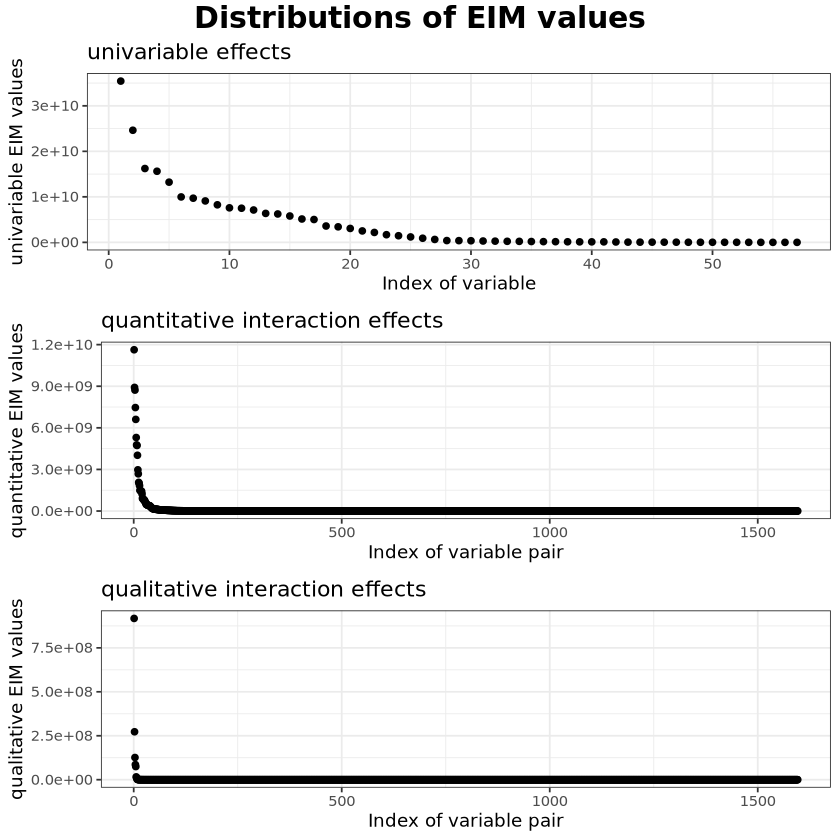

In [35]:

part_data_agri <- data_agri[c(1:1000), ]

interaction_agri <- interactionfor(dependent.variable.name = "gdp", data = part_data_agri, num.trees = 20)

## Inspect the rankings of the variables and variable pairs with respect to
## the univariable, quantitative, and qualitative EIM values:
# Univariable EIM values:
interaction_agri$eim.univ.sorted
# Pairs with top quantitative EIM values:
interaction_agri$eim.quant.sorted[1:5]
# Pairs with top qualitative EIM values:
interaction_agri$eim.qual.sorted[1:5]
## Investigate visually the forms of the interaction effects of the variable pairs with
## largest quantitative and qualitative EIM values:
plot(interaction_agri)
plotEffects(interaction_agri, type="quant") # type="quant" is default.
plotEffects(interaction_agri, type="qual")




company1   company8   company9   company3   company7   company6   company2 
11.5398989  3.8380814  2.8505651  2.6523940  1.9564490  1.9122166  1.7828841 
  company5   company4 
 0.9475764  0.3366125

company1 small AND company5 small company6 small AND company9 large 
                         3.664773                          3.215531 
company1 small AND company7 small company2 large AND company7 small 
                         2.530522                          1.622276 
company1 small AND company2 small 
                         1.369868

company2 AND company4 company3 AND company4 company1 AND company7 
            2.1297670             0.8900592             0.4442959 
company2 AND company7 company5 AND company9 
            0.3806099             0.2965779

Press [enter] for next plot. 


(Unadjusted) p-value: p = 4.50347954417907e-05 
(Unadjusted) p-value: p = 4.47414839298762e-26 


Press [enter] for next plot. 


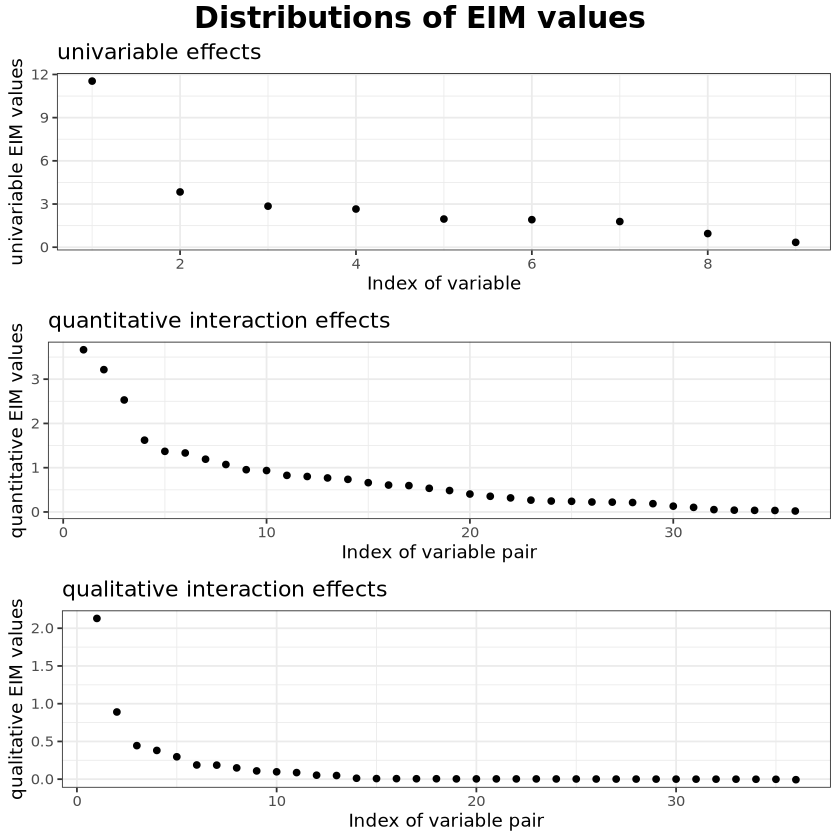

(Unadjusted) p-value: p = 1.41904027886024e-36 
(Unadjusted) p-value: p = 3.93742330147242e-45 


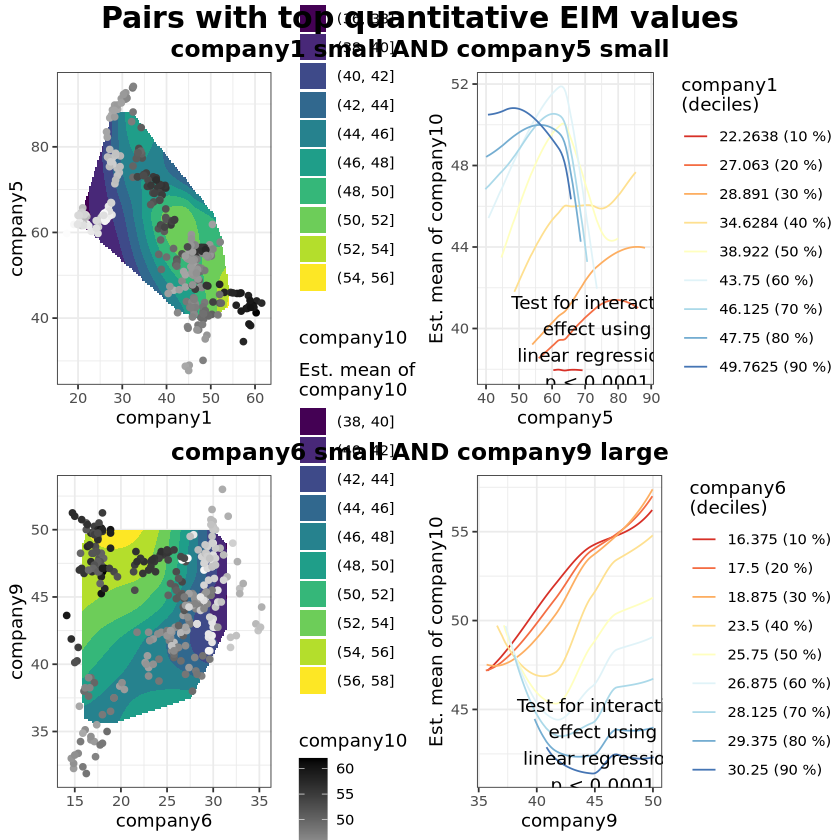

(Unadjusted) p-value: p = 4.50347954417907e-05 
(Unadjusted) p-value: p = 4.47414839298762e-26 


Press [enter] for next plot. 


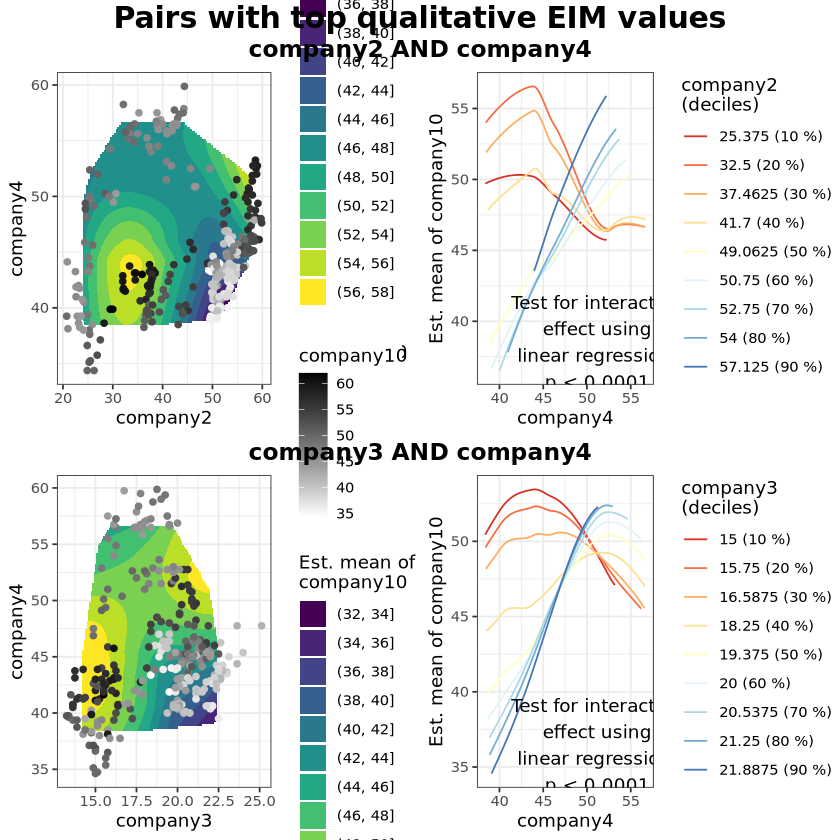

(Unadjusted) p-value: p = 2.79293167935391e-123 
(Unadjusted) p-value: p = 5.20050024237084e-92 


Press [enter] for next plot. 


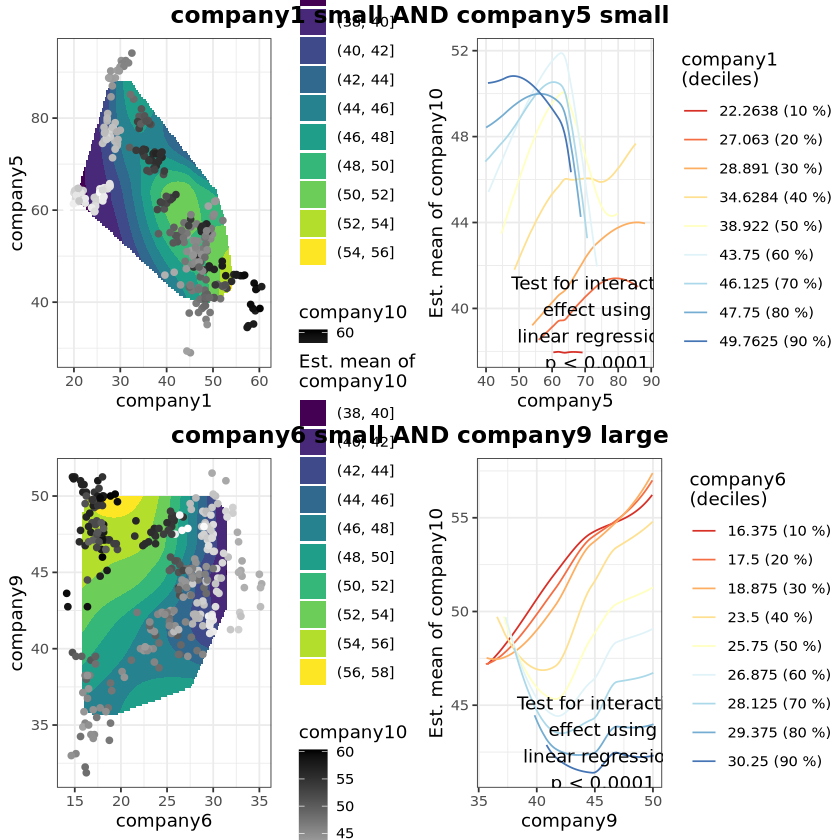

(Unadjusted) p-value: p = 0.00699381833952127 


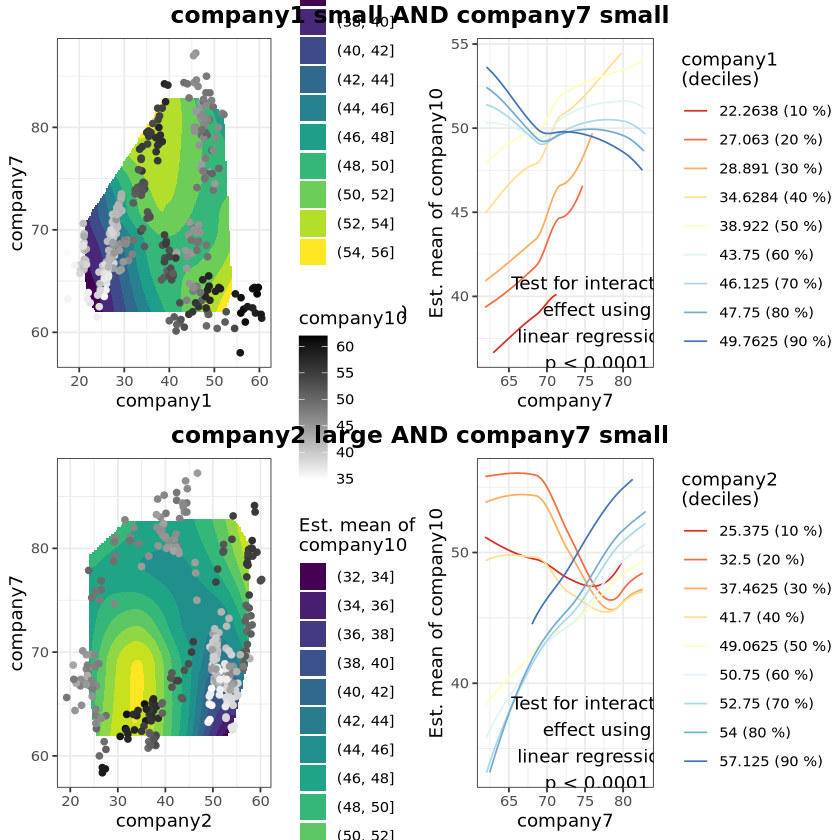

(Unadjusted) p-value: p = 1.41904027886024e-36 
(Unadjusted) p-value: p = 3.93742330147242e-45 


Press [enter] for next plot. 


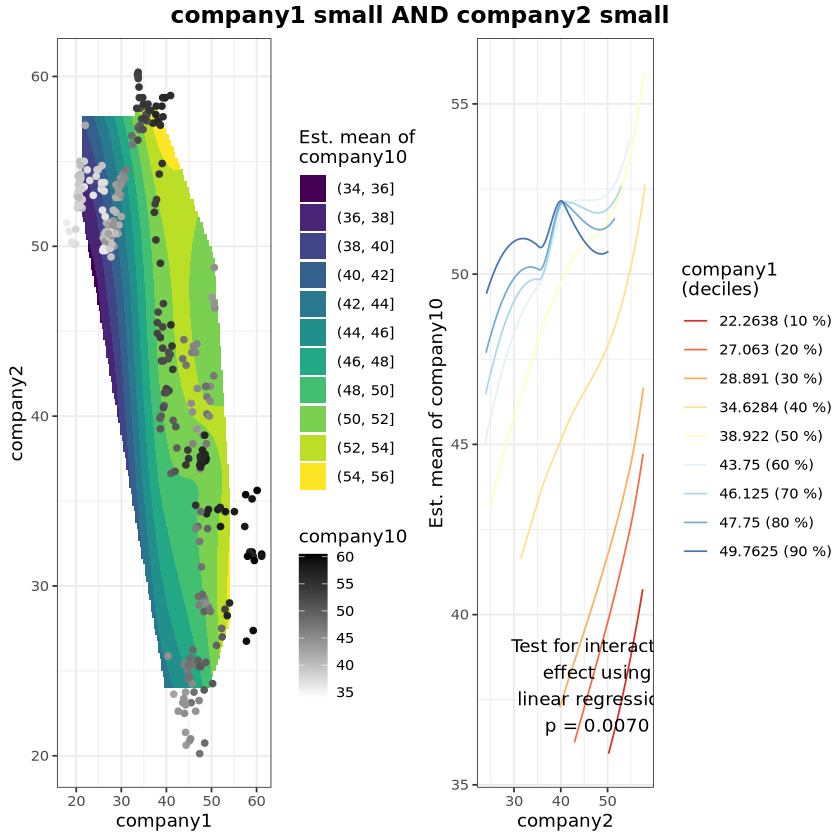

(Unadjusted) p-value: p = 2.79293167935391e-123 
(Unadjusted) p-value: p = 5.20050024237084e-92 


Press [enter] for next plot. 


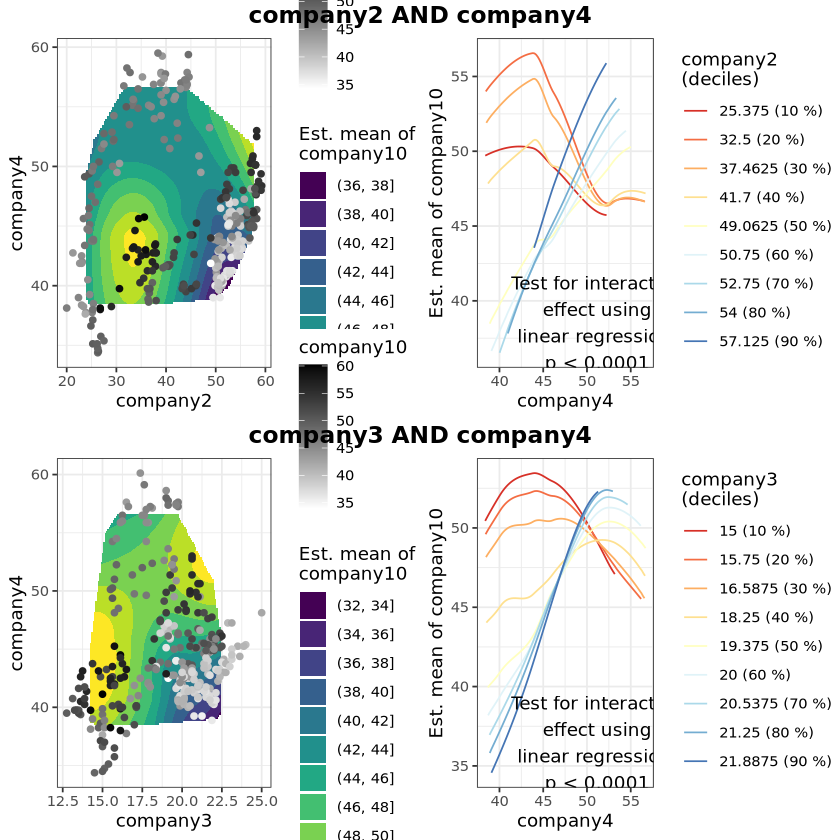

(Unadjusted) p-value: p = 0.0115351970222783 


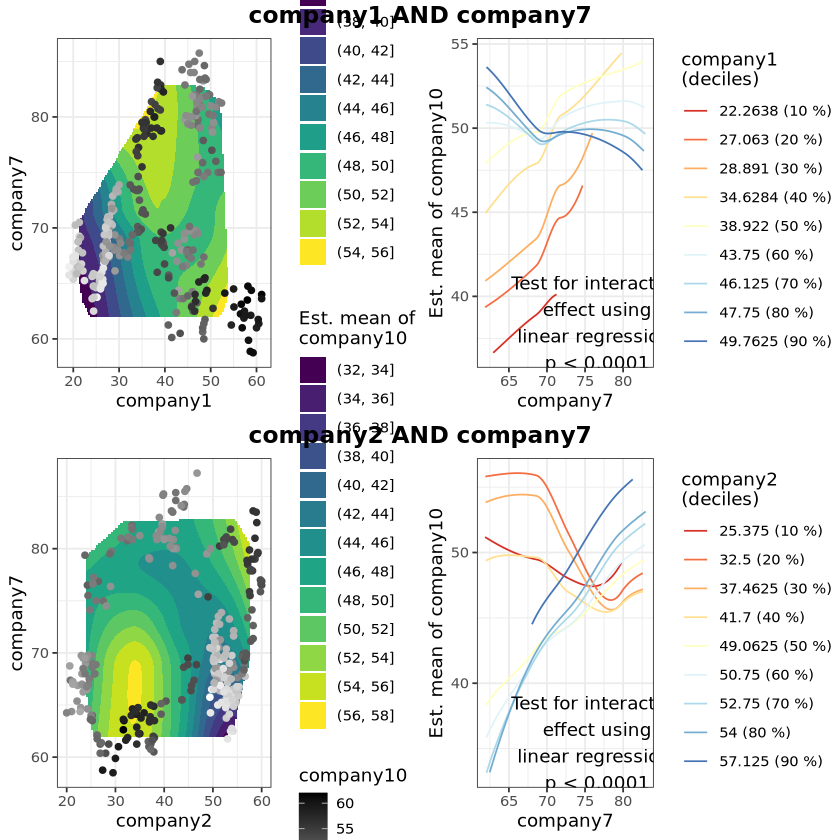

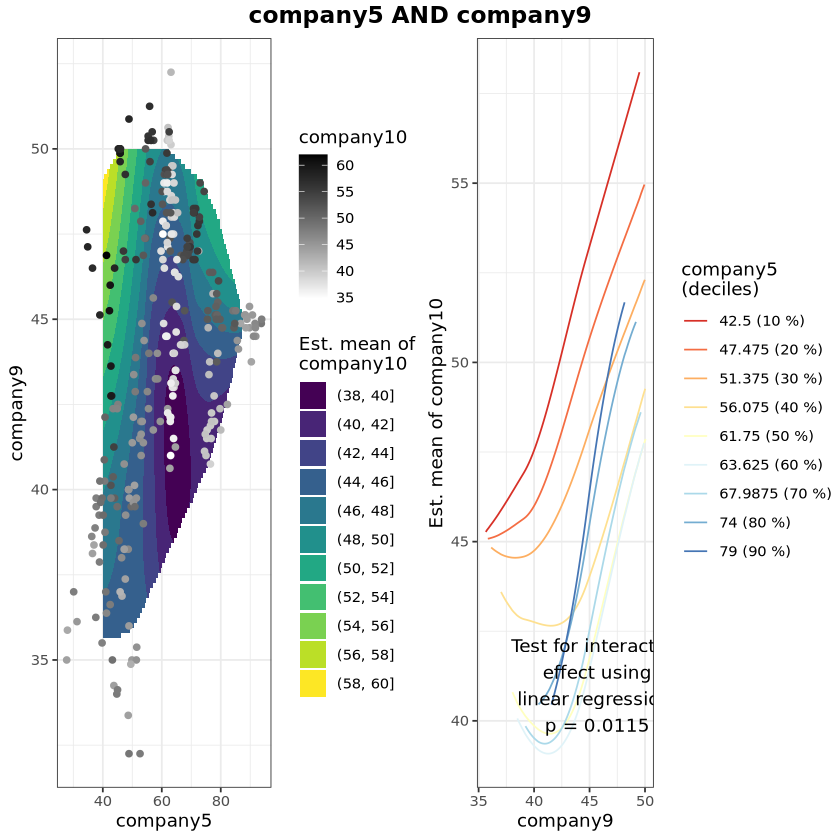

In [33]:
# Metric outcome:
data(stock)
modelcont <- interactionfor(dependent.variable.name = "company10", data = stock,
num.trees = 20)

# Univariable EIM values:
modelcont$eim.univ.sorted
# Pairs with top quantitative EIM values:
modelcont$eim.quant.sorted[1:5]
# Pairs with top qualitative EIM values:
modelcont$eim.qual.sorted[1:5]

## Investigate visually the forms of the interaction effects of the variable pairs with
## largest quantitative and qualitative EIM values:
plot(modelcont)
plotEffects(modelcont, type="quant") # type="quant" is default.
plotEffects(modelcont, type="qual")



In [34]:
head(stock)


company1 company2 company3 company4 company5 company6 company7 company8
0 17.219   50.500   18.750   43.000   60.875   26.375   67.750   19.000  
1 17.891   51.375   19.625   44.000   62.000   26.125   68.125   19.125  
2 18.438   50.875   19.875   43.875   61.875   27.250   68.500   18.250  
3 18.672   51.500   20.000   44.000   62.625   27.875   69.375   18.375  
4 17.438   49.000   20.000   41.375   59.750   25.875   63.250   16.500  
5 18.109   49.000   19.500   41.875   59.625   26.625   66.250   17.125  
  company9 company10
0 48.750   34.875   
1 48.750   35.625   
2 49.000   36.375   
3 49.625   36.250   
4 47.500   35.500   
5 47.750   34.375